In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

data = pd.read_csv('../data/raw/Walmart_Store_sales.csv')


data.head()

data.isnull().sum()

data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Check relationship between Weekly_Sales and Holiday_Flag

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the feature and the target variable
X = data[['Holiday_Flag']]
y = data['Weekly_Sales']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.366
Date:                Wed, 19 Jun 2024   Prob (F-statistic):            0.00222
Time:                        15:32:12   Log-Likelihood:                -66030.
No. Observations:                4504   AIC:                         1.321e+05
Df Residuals:                    4502   BIC:                         1.321e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.034e+06   8696.911    118.931   

In [4]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 320252684141.69
R^2 Score: -0.00


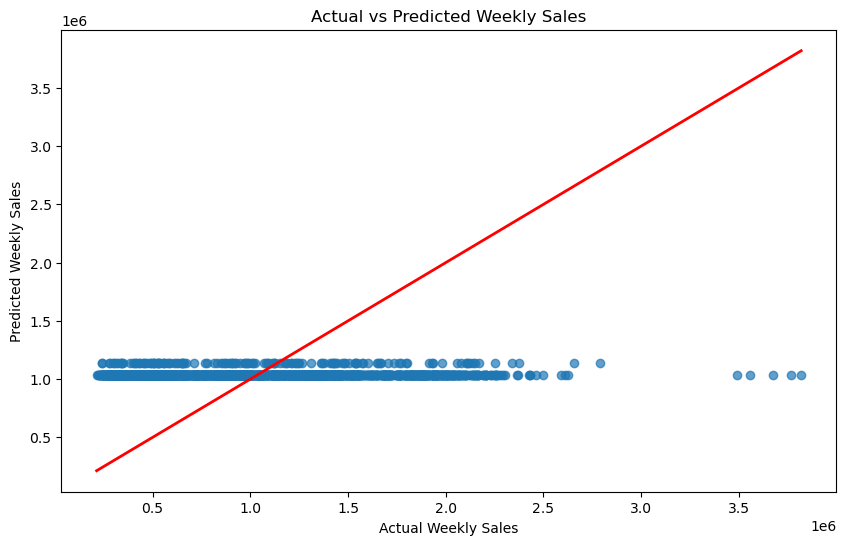

In [5]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()


Results: Overall, the results indicate that Holiday_Flag does not have a significant impact on Weekly_Sales based on this linear regression model.

**Check relationship between Weekly_Sales and Temperature**

In [18]:
# Define the features (independent variable) and the target (dependent variable)
X = data[['Temperature']]
Y = data['Weekly_Sales']

# Split the data: 70% training, 30% testing with random_state=13
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=13)

# Add a constant to the independent variable to include the intercept in the model
X_train_const = sm.add_constant(X_train)

# Fit the regression model on the training data
model = sm.OLS(Y_train, X_train_const).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.86
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           0.000990
Time:                        20:26:32   Log-Likelihood:                -65998.
No. Observations:                4504   AIC:                         1.320e+05
Df Residuals:                    4502   BIC:                         1.320e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.133e+06   2.87e+04     39.456      

In [17]:
# Add a constant to the test data
X_test_const = sm.add_constant(X_test)

# Make predictions on the test data
Y_pred = model.predict(X_test_const)

# Display the first few predictions
print(Y_pred.head())

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate R-squared
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

6396    1.068722e+06
277     1.009469e+06
2714    1.060763e+06
2090    1.041336e+06
4320    1.009573e+06
dtype: float64
Mean Squared Error: 328012933847.9265
R-squared: 0.006310407796392803


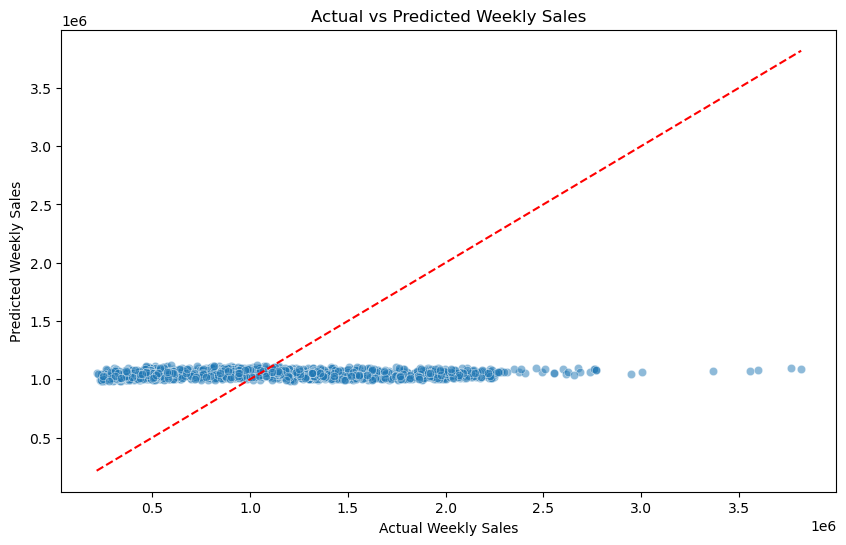

In [14]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.show()

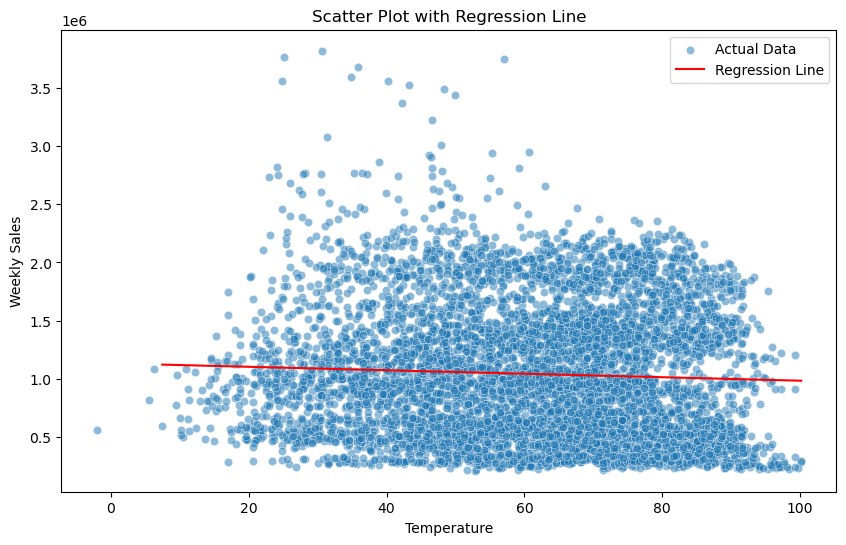

In [19]:
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, alpha=0.5, label='Actual Data')
sns.lineplot(x=X_test['Temperature'], y=Y_pred, color='red', label='Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()

Results of the relationship between Weekly_Sales and Temperature:

While the model indicates that temperature has a statistically significant impact on weekly sales, it is not a strong predictor by itself. On average, for each one-degree increase in Temperature, Weekly_Sales decreases by approximately 1493 units.

Check relationship between Weekly_Sales and Fuel_Price

Check relationship between Weekly_Sales and CPI 

Check relationship between Weekly_Sales and Unemployment 